## Machine Learning 101

In this tutorial, we'll build a simple machine learning model to **predict house prices** based on location, income, and housing features.

We’ll use the `housing_price_california.csv` dataset, which includes:
- Median income, house age, rooms, bedrooms
- Population and location (latitude, longitude)
- `Target`: Median house value (the value we want to predict)

---

### Objective

Use available features to predict **`Target`**, the median house price.

---

### What We'll Do

1. Load and explore the data  
2. Clean and normalize the data  
3. Train a model  
4. Evaluate predictions

---

### Models Used

- **Linear Regression** (simple and interpretable)  
- **Decision Tree Regressor** (captures more complex patterns)

We’ll compare the two to understand how different models behave on the same task.

In [1]:
# import basic libraries
import numpy as np
import pandas as pd

## 1. Data Overview

In [2]:
# read dataset
df = pd.read_csv("housing_price_california.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
# Basic info
print("\nData info:\n")
df.info()


Data info:

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


## 2. Data Cleaning & Preprocessing

In [11]:
# Drop rows with missing values (if any)
df = df.dropna()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
# Separate features and target
X = df.drop("Target", axis=1)
y = df["Target"]
display(X)
display(y)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

### Feature Scaling (Normalization)
**Why Normalize the Data?**

Some machine learning models — like **Linear Regression** — are sensitive to the **scale of the features**.

For example, imagine one feature is "income" (ranging from 0 to 100,000) and another is "house age" (ranging from 1 to 50). The model might **focus more on income** just because it has larger numbers, not because it's more important.

**Normalization** solves this by rescaling all features to a similar range, like 0 to 1.  
This helps the model treat all features fairly during training.

For models like **Decision Trees**, normalization is usually not needed, because they look at feature splits, not raw values.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature ranges after normalization:")
for col in X.columns:
    col_min = X_scaled_df[col].min()
    col_max = X_scaled_df[col].max()
    print(f"{col}: {col_min:.3f} to {col_max:.3f}")

Feature ranges after normalization:
MedInc: 0.000 to 1.000
HouseAge: 0.000 to 1.000
AveRooms: 0.000 to 1.000
AveBedrms: 0.000 to 1.000
Population: 0.000 to 1.000
AveOccup: 0.000 to 1.000
Latitude: 0.000 to 1.000
Longitude: 0.000 to 1.000


### Train-test Split

We split the data into two parts:

- **Training set**: used to train the model
- **Test set**: used to evaluate how well the model works on new data

Here’s what each part of the code means:

- X_scaled: The input features (already normalized)
- y: The target values (house prices)
- test_size=0.2:
    - → 20% of the data will be used for testing, 80% for training
    - → You can change this to 0.3 for a 70/30 split, for example
- random_state=42:
    - → Makes the split reproducible.
    - → If you run the code again, you’ll get the same result every time.

In [24]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 3. Train and Test a Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make Predictions
y_pred = model.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [54]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Explanation:
# Mean Squared Error (MSE) measures the average squared difference between
# the actual values and the predicted values.
# Lower MSE means predictions are closer to the true values, so better model performance.

# R-squared (R^2) indicates the proportion of variance in the target variable
# that is explained by the model.
# R^2 ranges from 0 to 1, where 1 means perfect prediction,
# and values closer to 0 mean the model explains little of the variance.

Mean Squared Error (MSE): 0.5558915986952436
R² Score: 0.5757877060324513


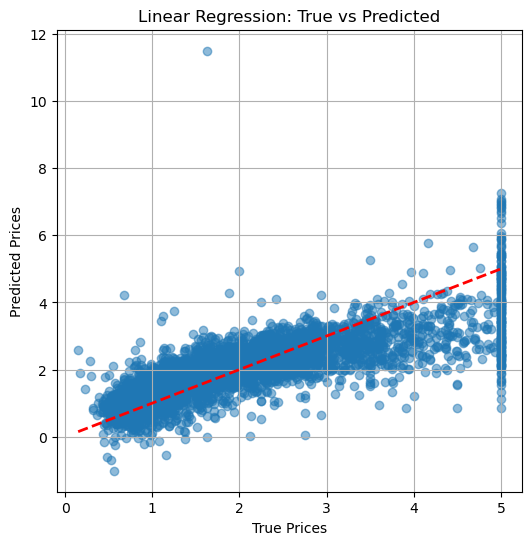

In [44]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Scatter plot: True vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: True vs Predicted")
plt.grid(True)
plt.show()

## 4. Train and Test a Decision Tree Model

### Decision Tree Regressor: Basic Idea

- The decision tree splits the data into smaller groups based on feature values.  
- At each step, it picks the feature and split point that best separate the data to minimize prediction error.  
- The tree continues splitting until stopping criteria are met (like max depth or minimum samples).  
- It predicts new data by following the splits down the tree to a leaf node, which gives the output value.

Unlike Linear Regression, **Decision Trees do not require normalized data** because they rely on thresholds, not on distances or scales.

---

### Comparing Models

- **Linear Regression** assumes a linear relationship and is sensitive to feature scales, so normalization helps.  
- **Decision Trees** capture non-linear patterns and handle unscaled data well, but can overfit if not controlled.


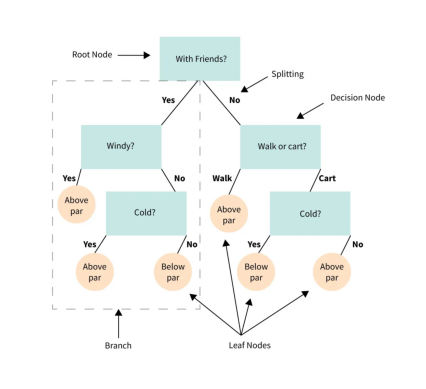

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('tree-graphic.webp')

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use original (non-normalized) data for Decision Tree
# Assume X and y are original data (no scaling)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_orig, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
# Predict on test set
y_pred_dt = dt_model.predict(X_test_orig)

In [48]:
# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt:.4f}")
print(f"Decision Tree R^2: {r2_dt:.4f}")

Decision Tree MSE: 0.4997
Decision Tree R^2: 0.6187


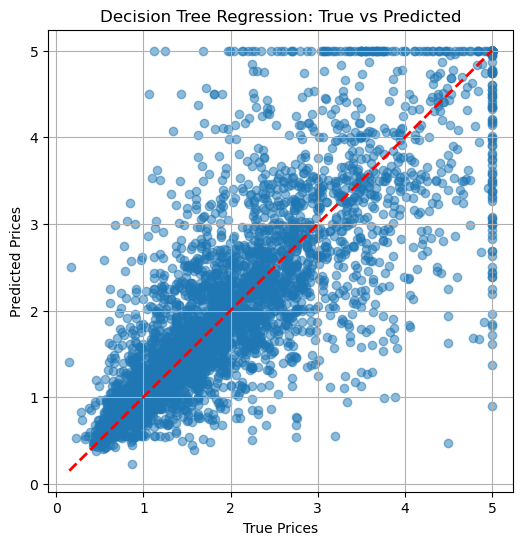

In [49]:
# Scatter plot: True vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regression: True vs Predicted")
plt.grid(True)
plt.show()

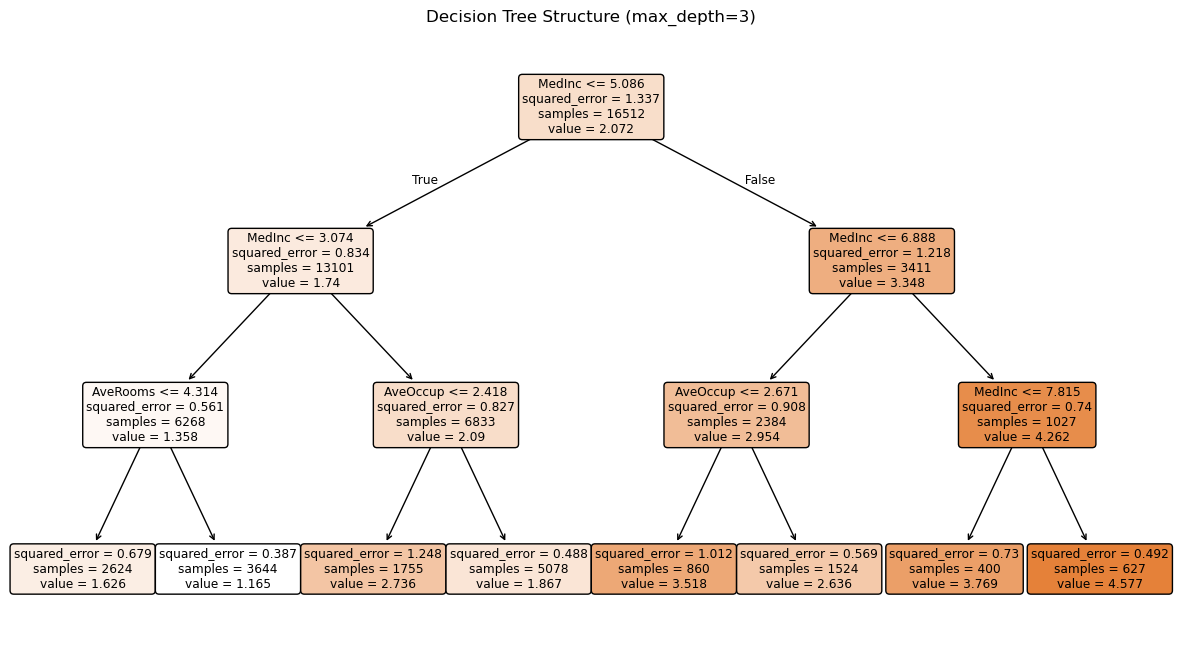

In [43]:
from sklearn.tree import plot_tree

# Train a shallow decision tree with max depth = 3 for easy visualization
dt_model_small = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model_small.fit(X_train_orig, y_train)

# Plot the shallow tree structure
plt.figure(figsize=(15,8))
plot_tree(
    dt_model_small,
    filled=True,               # Fill nodes with colors
    feature_names=X.columns,   # Show feature names on nodes
    rounded=True               # Rounded corners for nodes
)
plt.title("Decision Tree Structure (max_depth=3)")
plt.show()

### How to read the Decision Tree plot:
- Each box = a decision node or leaf.
- Condition inside (e.g., Feature <= value) splits data into left (True) and right (False) branches.
- Samples: number of data points reaching that node.
- Value: predicted output (average target) at that node.
- Leaves: final predictions with no further splits.

## Summary

- We learned how to **load and explore housing price data**.  
- We prepared data by **cleaning** and **scaling** features for regression.  
- We trained two models: **Linear Regression** and **Decision Tree Regression**.  
- We understood basic model **evaluation metrics**:  
  - **Mean Squared Error (MSE)** — measures average squared prediction error, lower is better.  
  - **R-squared (R²)** — indicates how much variance in the target is explained by the model, closer to 1 is better.  
- We visualized predictions using **scatter plots** to compare true vs predicted values.  
- We explored the **Decision Tree structure plot** to understand how the model splits data and makes predictions.  